In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

# Load MNIST data

In [3]:
nb_classes = 10 # number of different classes (10 digits)
# the data, shuffled and splitted between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Some examples of the training data

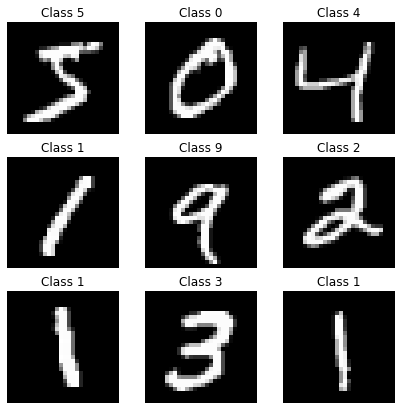

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [5]:
# here you need to reshape and scale inputs 
X_train = X_train.reshape(-1, 784).astype(np.float32)
X_test = X_test.reshape(-1, 784).astype(np.float32)

X_train /= 255.0
X_test /= 255.0


In [6]:
# sanity checks
assert np.ndim(X_train) == np.ndim(X_test) == 2, 'invalid number of dimensions'
assert X_train.shape[-1] == X_test.shape[-1] == 784, 'invalid number of features'

Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

*hint*: use `to_categorical` function

In [7]:
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)


In [8]:
# sanity checks
assert y_train.shape[-1] == y_test.shape[-1] == 10, 'number of target features must be 10'
assert np.array(list(map(lambda x: np.sum(x) == 1, y_train))).all(), 'you have done one hot encoding wrong ('

# Build the neural network

* In the next cell you are supposed to implement your architecture of **Feed Forward Network**
* Use the following Keras layers:
    * `Input` - layer for the input node, [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Input)
    * `Dense` - fully connected layer $z=WX^T$ (activation can be included as param), [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
    * `Activation` - activation layer, [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation)
    * `Dropout` (optional) - dropout regularizer, [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
    
    
* Make sure your last layer has `nb_classes` neurons and `softmax` activation which allows you to model probabilistic distribution over all classes 


Softmax activation:
$$softmax(\hat{y_i}) = \frac{e^{\hat{y_i}}}{\sum_{i=1}^n e^\hat{y_i}}$$
where $\hat{y_i}$ is *i*-th prediction and  $n$ is number of predictions

In [16]:
input_shape = X_train.shape[1:] # batch dim is not included


# < YOUR CODE FOR MODEL STARTS HERE >
input_layer = Input(shape=input_shape)
fc0 = Dense(64, activation='elu')(input_layer)
dropout0 = Dropout(0.9)(fc0)
fc1 = Dense(128, activation='relu')(dropout0)
dropout1 = Dropout(0.7)(fc1)
fc2 = Dense(32, activation='elu')(dropout1)
output_layer = Dense(10, activation='softmax')(fc2)



model = Model(inputs=input_layer, outputs=output_layer)
# < YOUR CODE ENDS HERE >

# let's compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Let's take a look at your model's summary

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330 

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into your model and it will learn to classify digits

In [18]:
training_info = model.fit(X_train, y_train,
          batch_size=128, epochs=10, verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 2.1289 - accuracy: 0.2428 - val_loss: 0.8738 - val_accuracy: 0.7646
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 1.3618 - accuracy: 0.5044 - val_loss: 0.6698 - val_accuracy: 0.8229
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2121 - accuracy: 0.5660 - val_loss: 0.6048 - val_accuracy: 0.8310
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1269 - accuracy: 0.5980 - val_loss: 0.5490 - val_accuracy: 0.8519
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0878 - accuracy: 0.6086 - val_loss: 0.5257 - val_accuracy: 0.8467
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0429 - accuracy: 0.6270 - val_loss: 0.4983 - val_accuracy: 0.8564
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0077 - accuracy: 0.6422 - val_loss: 0.4760 - val_accuracy: 0.8685
Epoch 

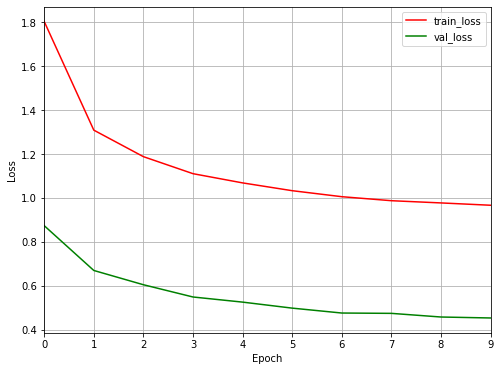

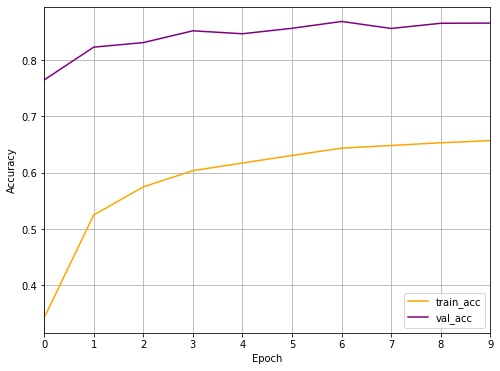

In [19]:
# get history from training info
hist_loss = training_info.history['loss']
hist_val_loss = training_info.history['val_loss']
hist_acc = training_info.history['accuracy']
hist_val_acc = training_info.history['val_accuracy']

# plot losses
plt.figure(figsize=(8, 6))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist_loss, color='red', label='train_loss')
plt.plot(hist_val_loss, color='green', label='val_loss')
plt.xlim(0, len(hist_loss) - 1)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# plot metrics
plt.figure(figsize=(8, 6))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist_acc, color='orange', label='train_acc')
plt.plot(hist_val_acc, color='purple', label='val_acc')
plt.xlim(0, len(hist_acc) - 1)
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Finally, evaluate its performance

In [20]:
train_acc = model.evaluate(X_train, y_train)[1]
test_acc = model.evaluate(X_test, y_test)[1]

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8656
Train accuracy: 0.8694833517074585
Test accuracy: 0.8655999898910522


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [21]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.nonzero(predicted_classes != np.argmax(y_test, axis=1))[0]

Sample correct predictions


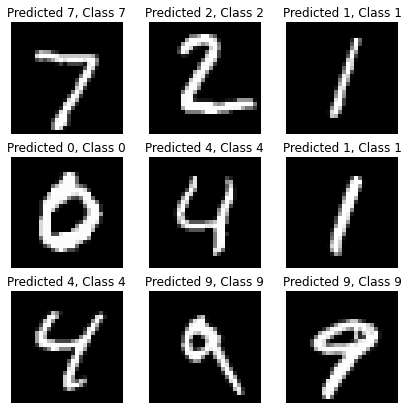

Sample wrong predictions


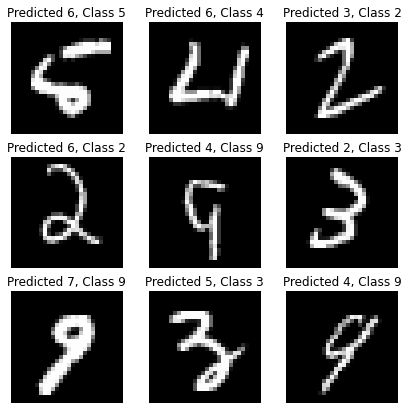

In [22]:
print('Sample correct predictions')
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], np.argmax(y_test[correct])))
    
plt.show()

print('Sample wrong predictions')
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], np.argmax(y_test[incorrect])))
    
plt.show()

# That's all!

This tutorial is extended version of Xavier Snelgrove tutorial